In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.impute import KNNImputer

In [409]:
### Importing Data and Creating Dataframe
train_df = pd.read_csv('input/train.csv')
test_df = pd.read_csv('input/test.csv') 

In [410]:
### Q1, Q2, Q3, Q4
print(list(train_df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [411]:
### Q5
train_missing = train_df.columns[train_df.isnull().any()].tolist()
test_missing = test_df.columns[test_df.isnull().any()].tolist()

print(train_missing)
print(test_missing)

['Age', 'Cabin', 'Embarked']
['Age', 'Fare', 'Cabin']


In [412]:
### Q6
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [413]:
### Q7
print(train_df.describe())
train_df['Pclass'] = train_df['Pclass'].astype("object")  
train_df['Survived'] = train_df['Survived'].astype("object") 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [414]:
### Q8
print(train_df.describe(include='O'))

        Survived  Pclass                               Name   Sex    Ticket  \
count        891     891                                891   891       891   
unique         2       3                                891     2       681   
top            0       3  Andersson, Miss. Sigrid Elisabeth  male  CA. 2343   
freq         549     491                                  1   577         7   

          Cabin Embarked  
count       204      889  
unique      147        3  
top     B96 B98        S  
freq          4      644  


In [415]:
### Q9
train_df['Pclass'] = train_df['Pclass'].astype("int32")  
train_df['Survived'] = train_df['Survived'].astype("int32") 
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [416]:
### Q10
print(train_df['Sex'].value_counts())
train_df.groupby('Survived')['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64


Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

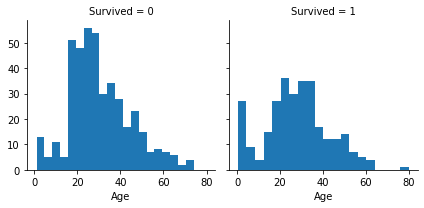

In [417]:
### Q11
grid = sns.FacetGrid(train_df, col="Survived")
grid.map(plt.hist, "Age", bins=20);

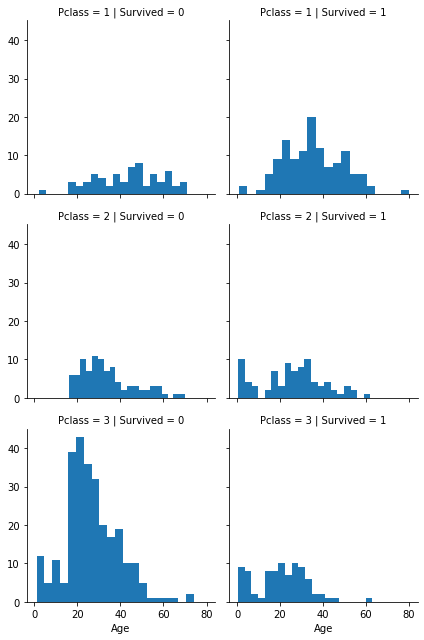

In [418]:
### Q12
grid = sns.FacetGrid(train_df, col="Survived", row = "Pclass")
grid.map(plt.hist, "Age", bins=20);

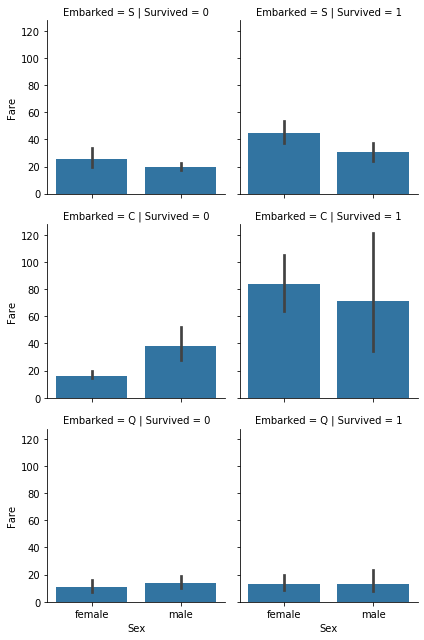

In [419]:
### Q13
grid = sns.FacetGrid(train_df, col="Survived", row = "Embarked")
grid.map(sns.barplot, "Sex", "Fare", order=["female", "male"]);

In [420]:
### Q14, Q15
print(train_df["Cabin"].isnull().sum())
print(test_df["Cabin"].isnull().sum())

### train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) 

687
327


In [421]:
### Q16
gender_map = {'female':1, 'male':0}
train_df['Gender'] = train_df['Sex'].map(gender_map).astype('int32')
train_df.astype({'Gender': 'int32'}).dtypes
# print(train_df['Gender'].head())
print(train_df['Gender'])
print(train_df['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Gender, Length: 891, dtype: int32
0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [422]:
### Q17
print(train_df.iloc[0:10, 5])

### Updating missing values in 'Age' generating random numbers between mean and standard
# Age_mean = train_df['Age'].mean()
# Age_std = train_df['Age'].std()
# train_df['Age'] = train_df['Age'].fillna(random.uniform(Age_mean - Age_std, Age_mean + Age_std))
# print(train_df.iloc[0:10, 5])


### Updating missing values in 'Age' using K-Nearest Neighbor algorithm
imputer = KNNImputer(n_neighbors=5)
imputed_train_df = train_df.filter(['Age','Fare'], axis=1)
imputed_train_df = pd.DataFrame(imputer.fit_transform(imputed_train_df),columns = imputed_train_df.columns) 
print(imputed_train_df.iloc[0:10, 0])
    

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
0    22.000
1    38.000
2    26.000
3    35.000
4    35.000
5    22.684
6    54.000
7     2.000
8    27.000
9    14.000
Name: Age, dtype: float64


In [423]:
### Q18
print(train_df.iloc[55:65, 11])

Freq_embarked = train_df.Embarked.dropna().mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(Freq_embarked)

print(train_df.iloc[55:65, 11])

55      S
56      S
57      C
58      S
59      S
60      C
61    NaN
62      S
63      S
64      C
Name: Embarked, dtype: object
55    S
56    S
57    C
58    S
59    S
60    C
61    S
62    S
63    S
64    C
Name: Embarked, dtype: object


In [424]:
### Q19
### Train dataset
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)


### Test dataset
print(test_df.iloc[150:160, 8])
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
print(test_df.iloc[150:160, 8])

150     83.1583
151      7.8958
152         NaN
153     12.1833
154     31.3875
155      7.5500
156    221.7792
157      7.8542
158     26.5500
159     13.7750
Name: Fare, dtype: float64
150     83.1583
151      7.8958
152     14.4542
153     12.1833
154     31.3875
155      7.5500
156    221.7792
157      7.8542
158     26.5500
159     13.7750
Name: Fare, dtype: float64


In [425]:
### Q20
print(train_df.iloc[0:10, 9])

for index, row in train_df.iterrows():
#     print(index, row['Fare'])
    if(row['Fare'] > -0.001 and row['Fare'] <= 7.91):
        train_df.loc[index, 'Fare'] = 0
    elif(row['Fare'] > 7.91 and row['Fare'] <= 14.454):
        train_df.loc[index, 'Fare'] = 1
    elif(row['Fare'] > 14.454 and row['Fare'] <= 31):
        train_df.loc[index, 'Fare'] = 2
    elif(row['Fare'] > 31 and row['Fare'] <= 512.329):
        train_df.loc[index, 'Fare'] = 3
    
train_df['Fare'] = train_df['Fare'].astype(int)        
print(train_df.iloc[0:10, 9])


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64
0    0
1    3
2    1
3    3
4    1
5    1
6    3
7    2
8    1
9    2
Name: Fare, dtype: int32
